## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
  @see calibrate_camera.ipynb
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Detected Lanes.

In [1]:
import numpy as np
from moviepy.video.io.VideoFileClip import VideoFileClip
import matplotlib.pyplot as plt
import os
import glob
import cv2
from scipy.misc import imread, imresize

get_ipython().magic('matplotlib inline')

from calibrate_camera import CameraCalibration
from lane_detection import LaneDetector

In [2]:
_annotate = dict(
    offset=250,
    src=np.float32([(132, 703), (540, 466), (740, 466), (1147, 703)])
)

detected_lanes_config = dict(
    offset=_annotate['offset'],
    src=_annotate['src'],
    history=7,
    dst=np.float32([(_annotate['src'][0][0] + _annotate['offset'], 720),
                    (_annotate['src'][0][0] + _annotate['offset'], 0),
                    (_annotate['src'][-1][0] - _annotate['offset'], 0),
                    (_annotate['src'][-1][0] - _annotate['offset'], 720)]),
    annotated_video_suffix='_annotated.mp4'
)

SRC = detected_lanes_config['src']
DST = detected_lanes_config['dst']
OFFSET = detected_lanes_config['offset']
HISTORY = detected_lanes_config['history']
ANNOTATED_VIDEO_SUFFIX = detected_lanes_config['annotated_video_suffix']

calibration = CameraCalibration()
lane_detector = LaneDetector(SRC, DST, n_images=HISTORY, calibration=calibration, offset=OFFSET)


def plot_detected_lane(image_path, process_function):
    """Returns processed image with detected lane"""
    image = imread(image_path)
#     return lane_detector.process_image(image)
    return process_function(image)


def save_detected_lane_on_video(video_path):
    """Saves annotated video with lane detection"""
    video = VideoFileClip(video_path)
    video_annotated = video.fl_image(lane_detector.process_image)
    name = os.path.basename(video_path)
    video_annotated_file_name = '{}{}'.format(name.split('.')[0], ANNOTATED_VIDEO_SUFFIX)
    video_annotated.write_videofile(video_annotated_file_name, audio=False)

In [3]:
def plot_images(image, image_path, process_function, save=False, title='Process & Annotated Image'):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
        f.suptitle(image_path, fontsize=50)
        f.tight_layout()
        ax1.set_title('Original Image', fontsize=25)
        ax1.imshow(image)
        annotated_image = plot_detected_lane(image_path, process_function)
        ax2.imshow(annotated_image)
        ax2.set_title(title, fontsize=25)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.) 
        if save:
            name = os.path.basename(image_path)
            f.savefig(
                './output_images/' + '{}{}'.format(name.split('.')[0], '_annotated.png'))  # save the figure to file
            plt.close(f)  # close the figure

def plot_all_test_images(process_function, title):
    images = glob.glob('test_images/*.jpg')
    for image_path in images:
        img = imread(image_path)
        plot_images(img, image_path, process_function, False, title)

In [4]:
## Detect lanes on the test images

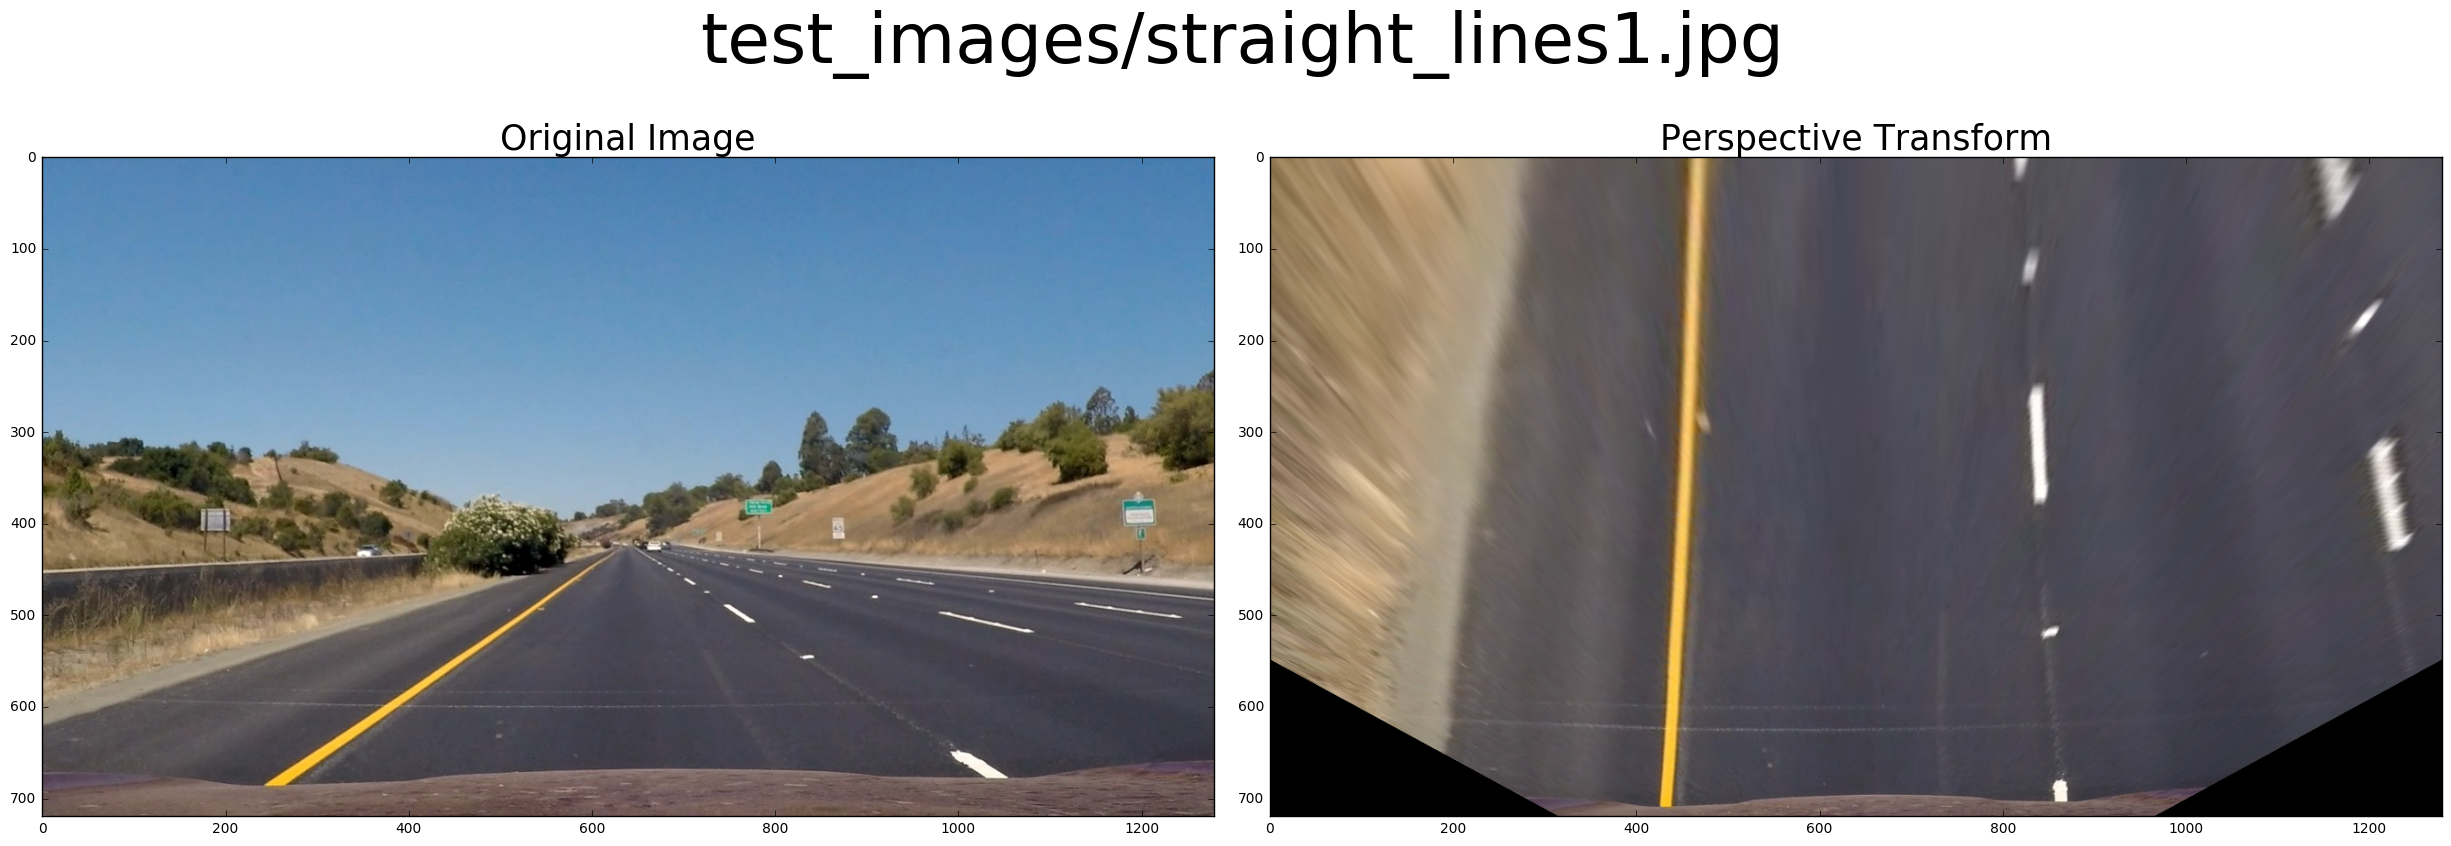

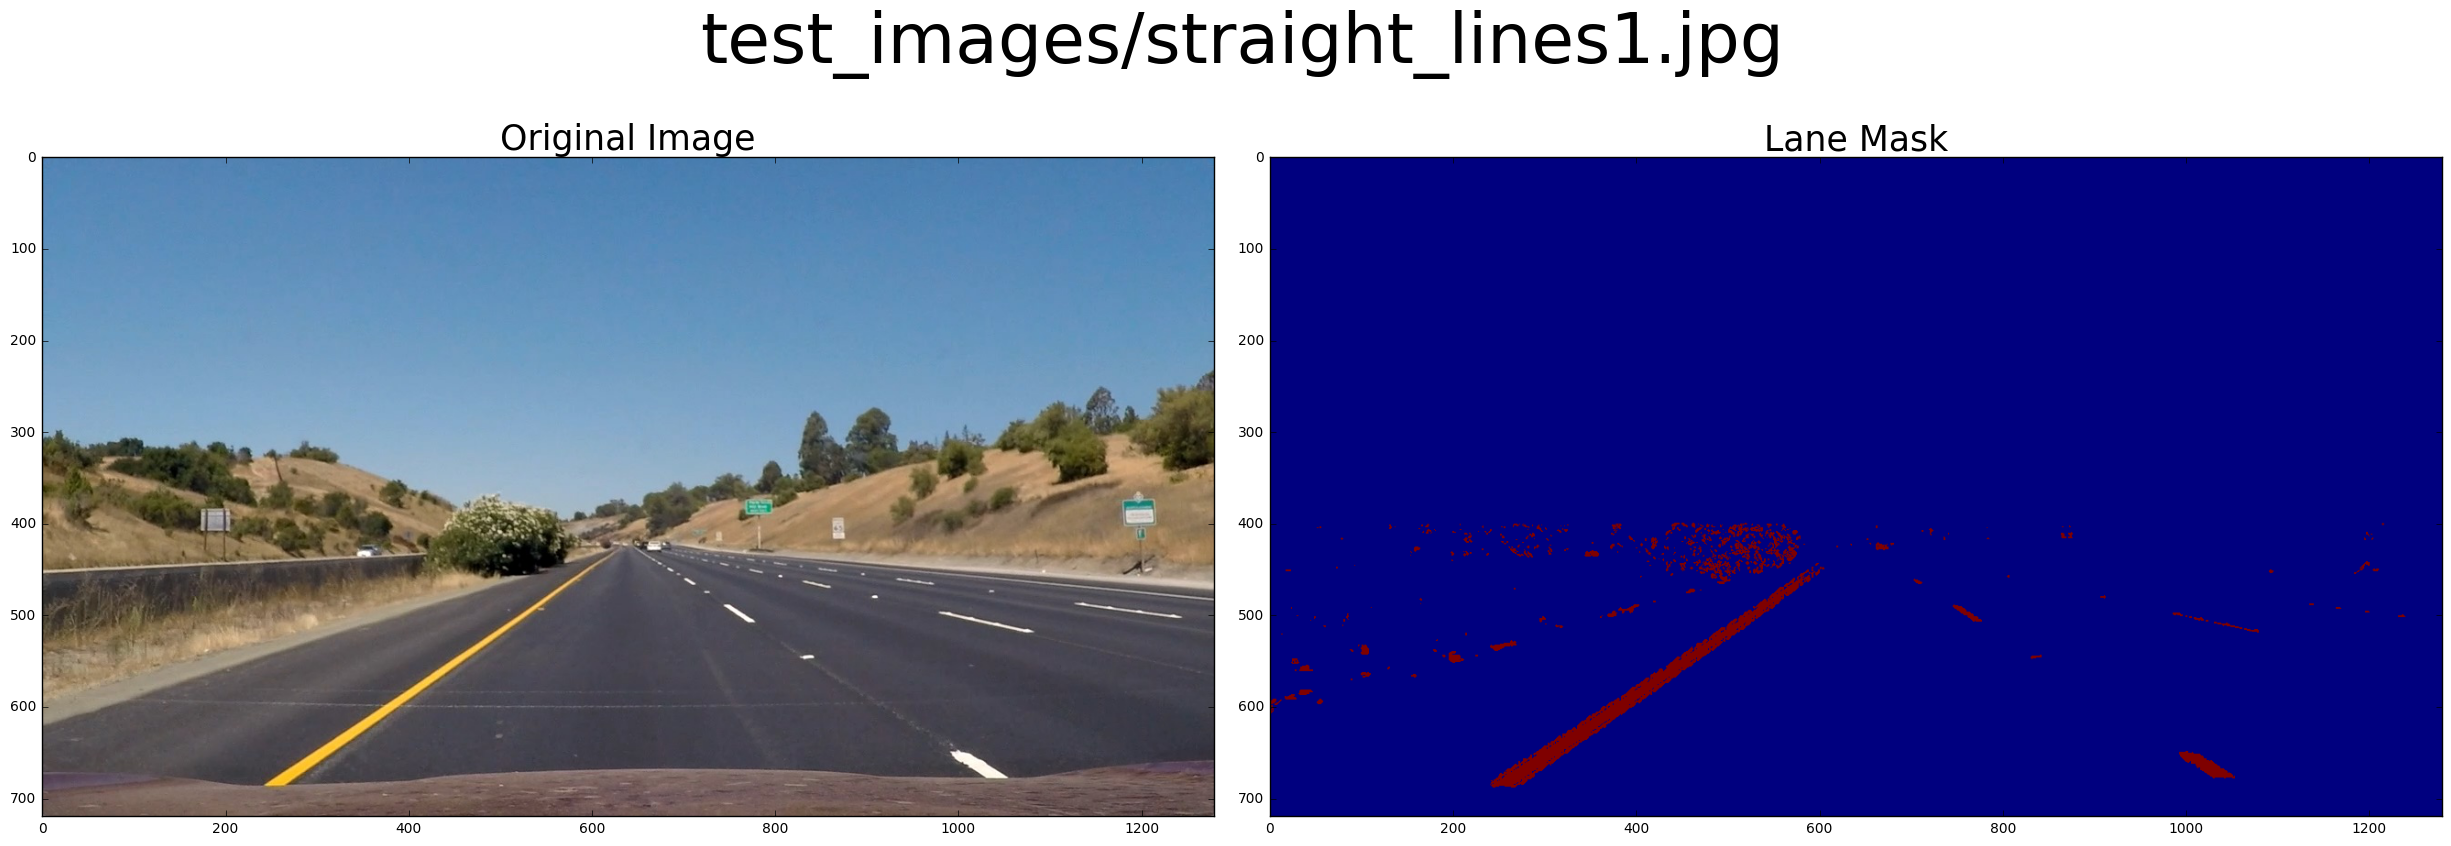

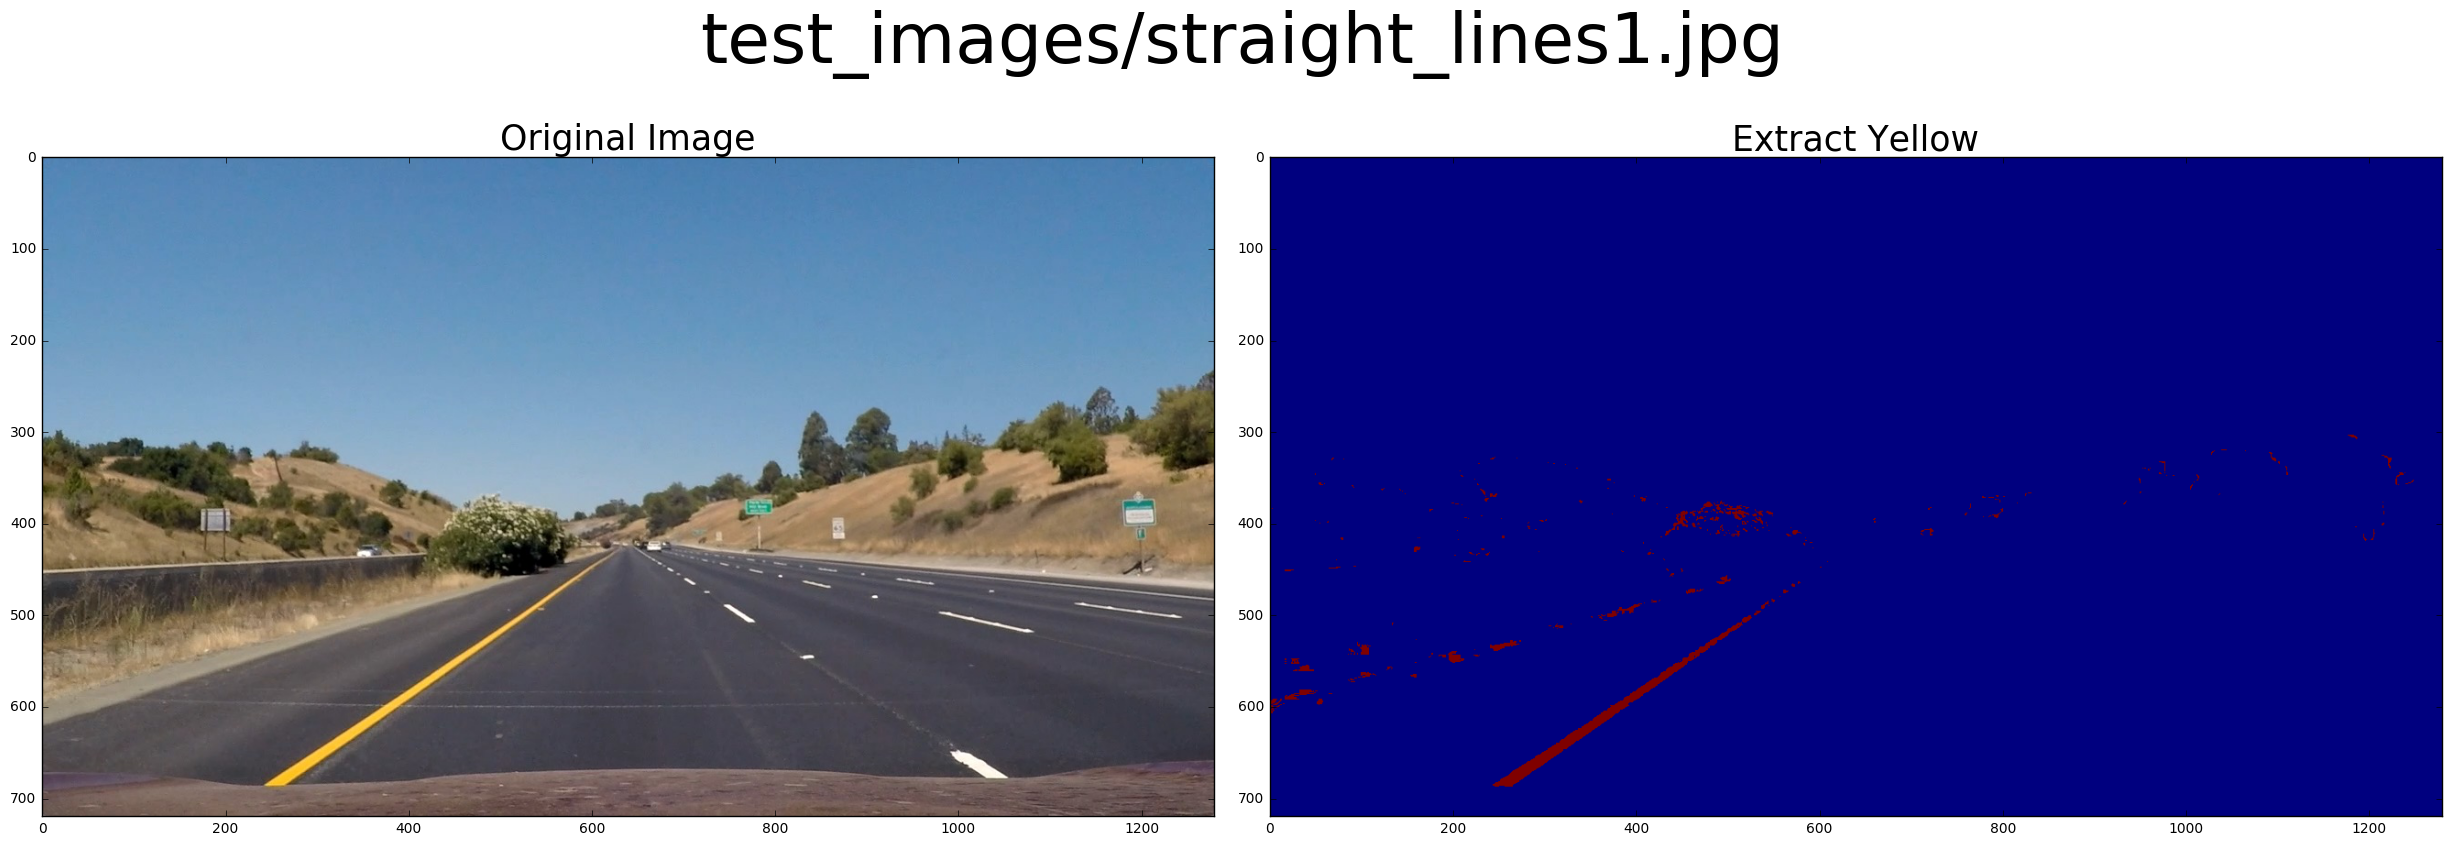

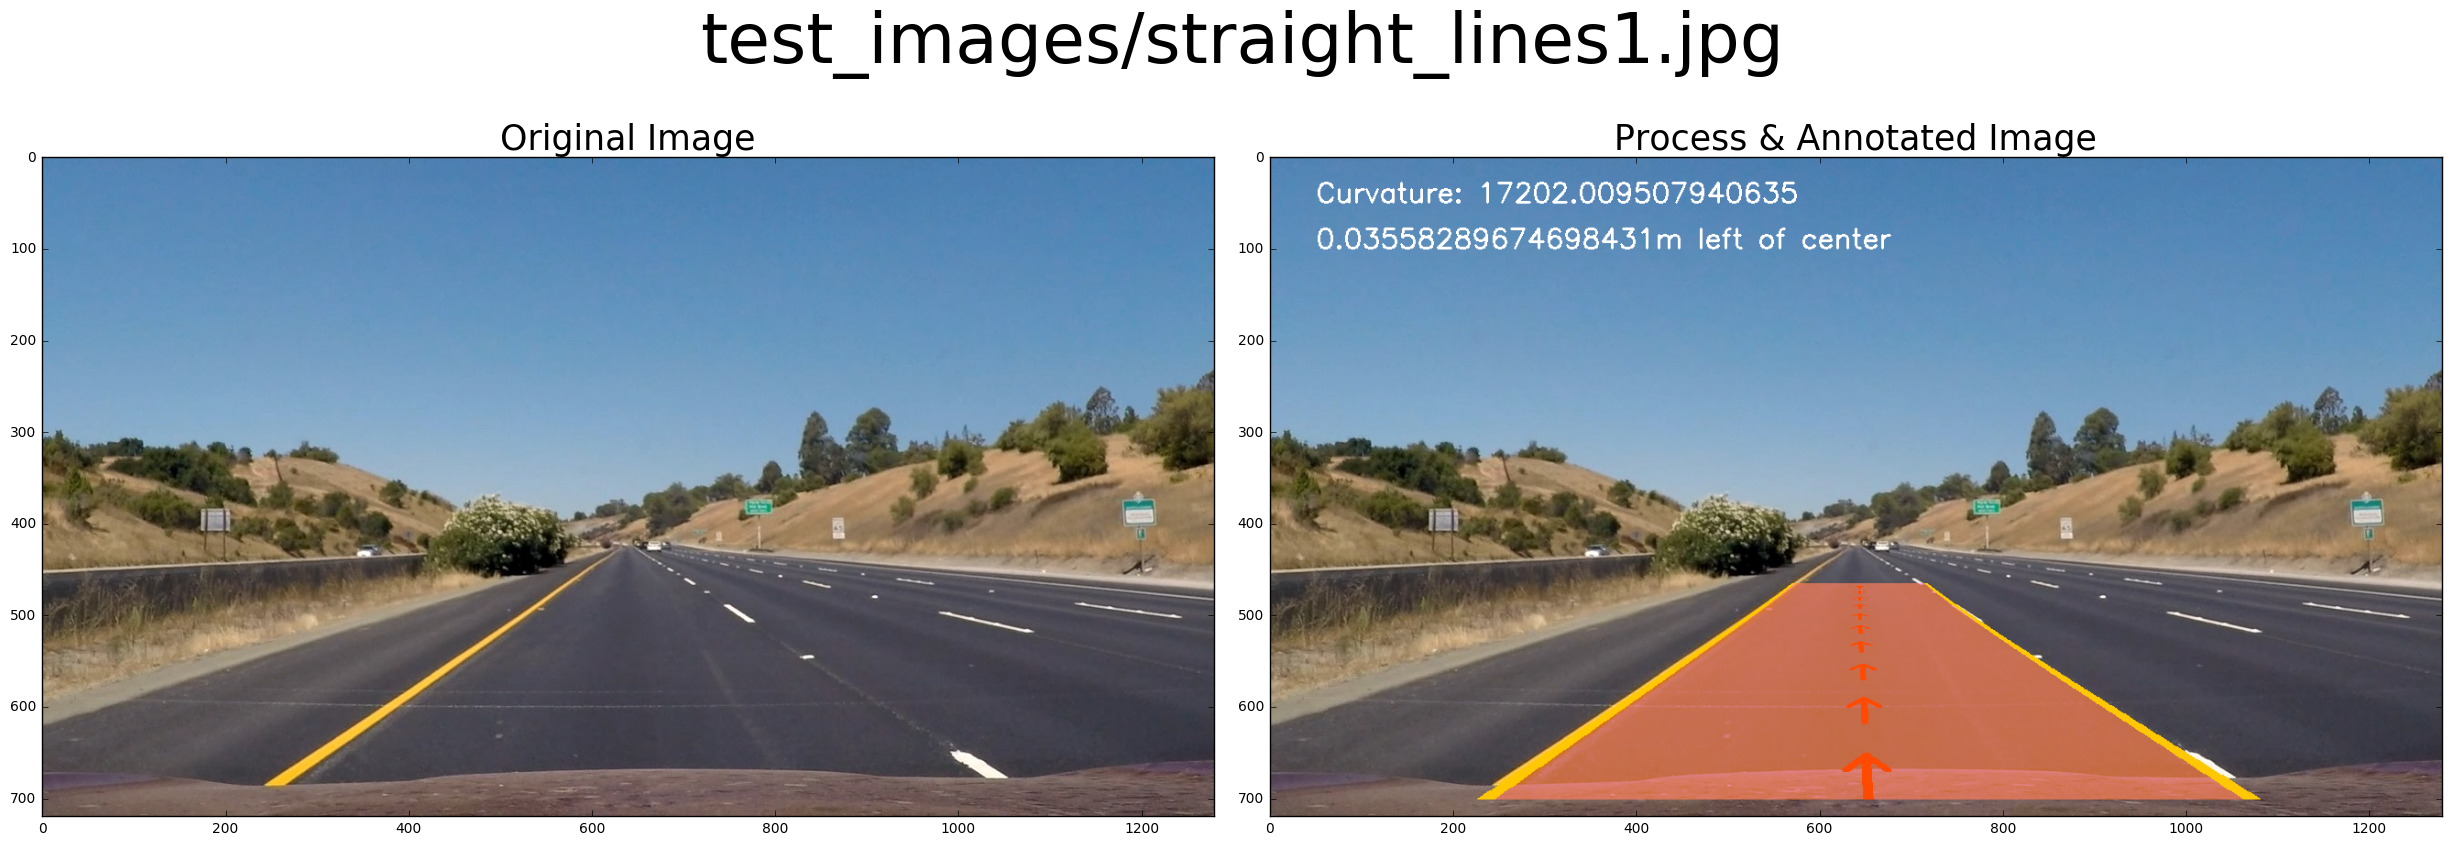

In [8]:
from processing import *

f = lambda image : lane_detector.perspective.transform(image)
plot_all_test_images(f, 'Perspective Transform')

f = lambda image : lane_mask(image)
plot_all_test_images(f, 'Lane Mask')

f = lambda image : extract_yellow(image)
plot_all_test_images(f, 'Extract Yellow')


f = lambda image : lane_detector.process_image(image)
plot_all_test_images(f, 'Process & Annotated Image')

In [6]:
### Detect lanes on the project video

In [7]:
# save_detected_lane_on_video('./project_video.mp4')
# https://youtu.be/MB3E06JQVwQ